<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20229_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Natural Frequencies (rad/s):
 [19.54395076 51.16672736]
Mode Shapes (columns):
 [[ 0.52573111  0.85065081]
 [ 0.85065081 -0.52573111]]


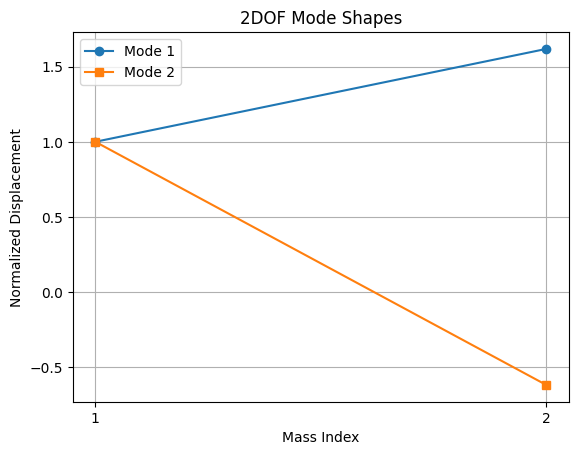

In [1]:
#@title 2DOF Vibration — Natural Frequencies and Mode Shapes
import numpy as np
import matplotlib.pyplot as plt

# Mass and stiffness values (modify as needed)
m1 = 1.0
m2 = 1.0
k1 = 1000.0
k2 = 1000.0

# Mass matrix
M = np.array([[m1, 0],
              [0,  m2]])

# Stiffness matrix
K = np.array([[k1+k2, -k2],
              [-k2,    k2]])

# Solve eigenvalue problem
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M).dot(K))

# Natural frequencies (rad/s)
omega = np.sqrt(eigvals)
idx = np.argsort(omega)  # sort
omega = omega[idx]
modes = eigvecs[:,idx]

print("Natural Frequencies (rad/s):\n", omega)
print("Mode Shapes (columns):\n", modes)

# Normalize mode shapes to first mass amplitude = 1
modes = modes / modes[0,:]

# Plot mode shapes
x = [1, 2]  # mass index
plt.figure()
plt.plot(x, modes[:,0], 'o-', label='Mode 1')
plt.plot(x, modes[:,1], 's-', label='Mode 2')
plt.xticks(x)
plt.xlabel("Mass Index")
plt.ylabel("Normalized Displacement")
plt.legend()
plt.title("2DOF Mode Shapes")
plt.grid(True)
plt.show()


In [2]:
# Symbolic 2-DOF Vibration Model (Theory Proof)

import sympy as sp

# Define symbols
m1, m2, k1, k2, w = sp.symbols('m1 m2 k1 k2 w')

# Mass and stiffness matrices
M = sp.Matrix([[m1, 0],
               [0,  m2]])

K = sp.Matrix([[k1 + k2, -k2],
               [-k2,      k2]])

# Characteristic equation
char_eq = (K - w**2 * M).det()

# Display determinant equation
sp.factor(char_eq)


k1*k2 - k1*m2*w**2 - k2*m1*w**2 - k2*m2*w**2 + m1*m2*w**4

In [3]:
# ==========================================================
# 2-DOF VIBRATION SYSTEM – SYMBOLIC DERIVATION (THEORY)
# ==========================================================

import sympy as sp

# ----------------------------------------------------------
# STEP 1: Define symbolic variables
# ----------------------------------------------------------
m1, m2 = sp.symbols('m1 m2', positive=True)
k1, k2 = sp.symbols('k1 k2', positive=True)
x1, x2 = sp.symbols('x1 x2', cls=sp.Function)
t = sp.symbols('t')
w = sp.symbols('omega')

# ----------------------------------------------------------
# STEP 2: Define generalized coordinates
# ----------------------------------------------------------
x1 = x1(t)
x2 = x2(t)

# ----------------------------------------------------------
# STEP 3: Write equations of motion (Newton's law)
# ----------------------------------------------------------
eq1 = m1 * sp.diff(x1, t, 2) + (k1 + k2)*x1 - k2*x2
eq2 = m2 * sp.diff(x2, t, 2) - k2*x1 + k2*x2

eq1, eq2


(-k2*x2(t) + m1*Derivative(x1(t), (t, 2)) + (k1 + k2)*x1(t),
 -k2*x1(t) + k2*x2(t) + m2*Derivative(x2(t), (t, 2)))

In [4]:
# ----------------------------------------------------------
# STEP 4: Convert equations to matrix form
# ----------------------------------------------------------
M = sp.Matrix([[m1, 0],
               [0,  m2]])

K = sp.Matrix([[k1 + k2, -k2],
               [-k2,      k2]])

M, K


(Matrix([
 [m1,  0],
 [ 0, m2]]),
 Matrix([
 [k1 + k2, -k2],
 [    -k2,  k2]]))